# Statistical Methods Project

## Data analysis and visualization

### Brief overview of the dataset

The Healthcare Australia dataset contains 5190 entries with 20 columns. Here's a brief overview of the columns and the first few rows of data:

1. sex: Gender of the patient (binary).
2. age: Age of the patient.
3. agesq: Age squared (possibly to capture non-linear age effects).
4. income: Income level.
5. levyplus: Indicator variable (binary).
6. freepoor: Indicator for free services for the poor (binary).
7. freepera: Indicator for free services for other categories (binary).
8. illness: Number of illnesses.
9. actdays: Number of active days.
10. hscore: Health score.
11. chcond1: Chronic condition 1 (binary).
12. chcond2: Chronic condition 2 (binary).
13. doctorco: Doctor consultations (count, target variable).
14. nondocco: Non-doctor consultations.
15. hospadmi: Hospital admissions.
16. hospdays: Number of days in hospital.
17. medicine: Medicine intake.
18. prescrib: Prescribed medication (binary).
19. nonpresc: Non-prescribed medication.
20. constant: A constant column (usually for regression models).


First, we'll load the dataset, then perform some basic data exploration and visualization to understand the distributions and relationships in the data.

In [ ]:
#install.packages("dlookr")

In [1]:
# Load necessary libraries
library(tidyverse)
library(ggplot2)
library(dlookr)
# Read the dataset
health_data <- read.csv("HealthCareAustralia.csv")
healthcare_data <- read.csv("HealthCareAustralia.csv")
data <- read.csv("HealthCareAustralia.csv")

-- Attaching core tidyverse packages ------------------------ tidyverse 2.0.0 --
v dplyr     1.1.3     v readr     2.1.4
v forcats   1.0.0     v stringr   1.5.0
v ggplot2   3.4.4     v tibble    3.2.1
v lubridate 1.9.3     v tidyr     1.3.0
v purrr     1.0.2     
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()
i Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Warning message:
"il pacchetto 'dlookr' `e stato creato con R versione 4.3.2"

Caricamento pacchetto: 'dlookr'


Il seguente oggetto `e mascherato da 'package:tidyr':

    extract


Il seguente oggetto `e mascherato da 'package:base':

    transform




In [2]:
# Basic summary of the data
summary(health_data)

      sex              age             agesq            income      
 Min.   :0.0000   Min.   :0.1900   Min.   :0.0361   Min.   :0.0000  
 1st Qu.:0.0000   1st Qu.:0.2200   1st Qu.:0.0484   1st Qu.:0.2500  
 Median :1.0000   Median :0.3200   Median :0.1024   Median :0.5500  
 Mean   :0.5206   Mean   :0.4064   Mean   :0.2071   Mean   :0.5832  
 3rd Qu.:1.0000   3rd Qu.:0.6200   3rd Qu.:0.3844   3rd Qu.:0.9000  
 Max.   :1.0000   Max.   :0.7200   Max.   :0.5184   Max.   :1.5000  
    levyplus         freepoor          freepera         illness     
 Min.   :0.0000   Min.   :0.00000   Min.   :0.0000   Min.   :0.000  
 1st Qu.:0.0000   1st Qu.:0.00000   1st Qu.:0.0000   1st Qu.:0.000  
 Median :0.0000   Median :0.00000   Median :0.0000   Median :1.000  
 Mean   :0.4428   Mean   :0.04277   Mean   :0.2102   Mean   :1.432  
 3rd Qu.:1.0000   3rd Qu.:0.00000   3rd Qu.:0.0000   3rd Qu.:2.000  
 Max.   :1.0000   Max.   :1.00000   Max.   :1.0000   Max.   :5.000  
    actdays            hscore     

1. Sex: The 'sex' variable is binary (0 or 1), suggesting it represents two categories, likely male and female.

2. Age: Age ranges from 0.19 to 0.72, but it appears to be normalized or transformed in some way, as typical age is not expressed in these terms.

3. Income: 'Income' also seems to be normalized or transformed, with values ranging from 0 to 1.5.

4. Levyplus, Freepoor, Freepera: These variables are categorical/binary (0 or 1), possibly indicating the presence or absence of a specific feature.

5. Illness, Actdays, Hscore, Chcond1, Chcond2: These variables seem to relate to health, number of limited activity days, health score, and chronic health conditions.

6. Doctorco (dvisits): variable of interest, 'doctorco', ranges from 0 to 9, representing the number of medical visits.

Other Variables: 'Nondocco', 'Hospadmi', 'Hospdays', 'Medicine', 'Prescrib', 'Nonpresc' are other variables that are related to health and healthcare.

## Inspect Data Structure

In [3]:
dim(health_data) # Returns the dimensions of the data
names(health_data)  # Lists the column names
str(health_data)  # Summarizes the data types and a preview of the values


[1] 5190   20

[1] "sex"      "age"      "agesq"    "income"   "levyplus" "freepoor"
 [7] "freepera" "illness"  "actdays"  "hscore"   "chcond1"  "chcond2" 
[13] "doctorco" "nondocco" "hospadmi" "hospdays" "medicine" "prescrib"
[19] "nonpresc" "constant"

'data.frame':	5190 obs. of  20 variables:
 $ sex     : int  1 1 0 0 0 1 1 1 1 0 ...
 $ age     : num  0.19 0.19 0.19 0.19 0.19 0.19 0.19 0.19 0.19 0.19 ...
 $ agesq   : num  0.0361 0.0361 0.0361 0.0361 0.0361 0.0361 0.0361 0.0361 0.0361 0.0361 ...
 $ income  : num  0.55 0.45 0.9 0.15 0.45 0.35 0.55 0.15 0.65 0.15 ...
 $ levyplus: int  1 1 0 0 0 0 0 0 1 1 ...
 $ freepoor: int  0 0 0 0 0 0 0 0 0 0 ...
 $ freepera: int  0 0 0 0 0 0 0 0 0 0 ...
 $ illness : int  1 1 3 1 2 5 4 3 2 1 ...
 $ actdays : int  4 2 0 0 5 1 0 0 0 0 ...
 $ hscore  : int  1 1 0 0 1 9 2 6 5 0 ...
 $ chcond1 : int  0 0 0 0 1 1 0 0 0 0 ...
 $ chcond2 : int  0 0 0 0 0 0 0 0 0 0 ...
 $ doctorco: int  1 1 1 1 1 1 1 1 1 1 ...
 $ nondocco: int  0 0 0 0 0 0 0 0 0 0 ...
 $ hospadmi: int  0 0 1 0 0 0 0 0 0 0 ...
 $ hospdays: int  0 0 4 0 0 0 0 0 0 0 ...
 $ medicine: int  1 2 2 0 3 1 0 1 1 1 ...
 $ prescrib: int  1 1 1 0 1 1 0 1 0 1 ...
 $ nonpresc: int  0 1 1 0 2 0 0 0 1 0 ...
 $ constant: int  1 1 1 1 1 1 1 1 1 1 ...


Observations:

- Size: dataset has 5190 observations (rows) and 20 variables (columns).

Variables and Types

- Categorical/Nominal: sex, levyplus, freepoor, freepera, illness, chcond1, chcond2, doctorco, nondocco, hospadmi, constant (0 or 1 values indicate categories)
- Numerical (Continuous): age, agesq, income, actdays, hscore, hospdays, medicine, prescrib, nonpresc

Interpretation & Next Steps:

1. Missing Values: We need to check for missing values.

2. Categorical Exploration:  For categorical variables, we'll use frequency tables and proportions to learn how the responses are distributed within each category.

3. Numerical Exploration: For numeric variables, we'll examine:

- Central Tendency: (Mean, median, mode)
- Dispersion: (Standard deviation, range, and interquartile range)
- Distribution: (Histograms, boxplots)

### Missing Values

In [4]:
# Provides a concise overview of missing values in each column
colSums(is.na(health_data)) 

sex      age    agesq   income levyplus freepoor freepera  illness 
       0        0        0        0        0        0        0        0 
 actdays   hscore  chcond1  chcond2 doctorco nondocco hospadmi hospdays 
       0        0        0        0        0        0        0        0 
medicine prescrib nonpresc constant 
       0        0        0        0

There are no missing values in the dataset, so we don't need to handle any missing data.

## Categorial Variable Analysis

In [5]:
library(summarytools)

dfsum <- dfSummary(health_data, plain.ascii = FALSE, style = "grid") 

print(dfsum, method = "render")

#create a png for dfsum
png("dfsum.png", width = 800, height = 600)



Caricamento pacchetto: 'summarytools'


Il seguente oggetto `e mascherato da 'package:tibble':

    view


Warning message in repr_html.shiny.tag(obj):
"Inserting HTML strings into <head> is currently not supported"


Shiny tags cannot be represented in plain text (need html)

In [54]:
# Apply "range" and "unique" to relevant variables:
for (var in names(health_data)[sapply(health_data, is.integer)]) {
  print(paste0("Summary for ", var))
  print(paste0("Range: ", 
  min(health_data[[var]]), " - ", max(health_data[[var]])))
  print(paste0("Unique Values: ", length(unique(health_data[[var]]))))
  print("------------------")
}

# We'll use the describe() function from the 'dlookr' package:
summary_num <- describe(health_data) 

# Use view to get a nicely formatted display:
View(summary_num)


[1] "Summary for sex"
[1] "Range: 0 - 1"
[1] "Unique Values: 2"
[1] "------------------"
[1] "Summary for levyplus"
[1] "Range: 0 - 1"
[1] "Unique Values: 2"
[1] "------------------"
[1] "Summary for freepoor"
[1] "Range: 0 - 1"
[1] "Unique Values: 2"
[1] "------------------"
[1] "Summary for freepera"
[1] "Range: 0 - 1"
[1] "Unique Values: 2"
[1] "------------------"
[1] "Summary for illness"
[1] "Range: 0 - 5"
[1] "Unique Values: 6"
[1] "------------------"
[1] "Summary for actdays"
[1] "Range: 0 - 14"
[1] "Unique Values: 15"
[1] "------------------"
[1] "Summary for hscore"
[1] "Range: 0 - 12"
[1] "Unique Values: 13"
[1] "------------------"
[1] "Summary for chcond1"
[1] "Range: 0 - 1"
[1] "Unique Values: 2"
[1] "------------------"
[1] "Summary for chcond2"
[1] "Range: 0 - 1"
[1] "Unique Values: 2"
[1] "------------------"
[1] "Summary for doctorco"
[1] "Range: 0 - 9"
[1] "Unique Values: 10"
[1] "------------------"
[1] "Summary for nondocco"
[1] "Range: 0 - 11"
[1] "Unique Values:

described_variables,n,na,mean,sd,se_mean,IQR,skewness,kurtosis,p00,...,p40,p50,p60,p70,p75,p80,p90,p95,p99,p100
<chr>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
sex,5190,0,0.52061657,0.4996229,0.006935195,1.000,-0.08256034,-1.99395232,0.0000,...,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
age,5190,0,0.40638536,0.2047818,0.002842547,0.400,0.42144293,-1.50121431,0.1900,...,0.2700,0.3200,0.4700,0.5700,0.6200,0.6700,0.7200,0.7200,0.7200,0.7200
agesq,5190,0,0.20707657,0.1856365,0.002576793,0.336,0.64056950,-1.24894906,0.0361,...,0.0729,0.1024,0.2209,0.3249,0.3844,0.4489,0.5184,0.5184,0.5184,0.5184
income,5190,0,0.58315992,0.3689067,0.005120742,0.650,0.73411018,-0.18254331,0.0000,...,0.3500,0.5500,0.6500,0.7500,0.9000,0.9000,1.1000,1.3000,1.5000,1.5000
levyplus,5190,0,0.44277457,0.4967623,0.006895487,1.000,0.23048244,-1.94762853,0.0000,...,0.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
freepoor,5190,0,0.04277457,0.2023680,0.002809041,0.000,4.52049507,18.44198227,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,1.0000
freepera,5190,0,0.21021195,0.4074983,0.005656426,0.000,1.42282682,0.02444544,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
illness,5190,0,1.43198459,1.3841524,0.019213224,2.000,0.93985354,0.15897691,0.0000,...,1.0000,1.0000,1.0000,2.0000,2.0000,3.0000,3.0000,4.0000,5.0000,5.0000
actdays,5190,0,0.86184971,2.8876284,0.040082761,0.000,3.82825948,13.83651861,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,2.0000,7.0000,14.0000,14.0000


## Overall Observations:

- Binary Variables:  Many of integer variables like 'sex', 'levyplus', 'freepoor', etc.,  seem to be binary (0 or 1).  These likely represent "yes/no" conditions or categories.

- Limited Categorical Variables: Variables like 'illness', 'doctorco,' etc., contain a small set of discrete values, indicating they may represent different levels of a condition or grouped responses.

- Skewness:  Measures symmetry; many of your variables seem positively skewed (long right tail) indicated by skewness values of greater than 0. (e.g.,  'actdays', 'hscore', 'doctorco').  This could point to the presence of a few observations with much higher values.

- Kurtosis:  Measures "peakedness" of the distribution. Values that are larger than 0 mean higher peakedness than a normal distribution and often have fatter tails (e.g., 'illness', 'actdays').

- Range & IQR:  Give us a view of the spread of the data. IQR (Interquartile Range: Q75 - Q25) highlights the middle 50% of the data. Some variables have higher variability due to larger ranges and IQR (e.g., 'hospdays', 'actdays').

-  Health Conditions:  The 'chcond1' and 'chcond2' variables provide important insights into participants' health. 'chcond1' implies chronic conditions with no activity constraint; and 'chcond2' implies limitations from the chronic condition(s).

## Important Considerations

- Outliers:  The large skewness and kurtosis values, along with ranges, should make us investigate the presence of outliers.

- Transformations:  Depending on the analysis techniques we choose,  we might consider transforming some of the skewed variables later to bring their distributions closer to normality.


## Other tests

using Hmisc. it is used to data analysis and visualization.

In [6]:
library(Hmisc)

describe(health_data$doctorco)


Caricamento pacchetto: 'Hmisc'


I seguenti oggetti sono mascherati da 'package:summarytools':

    label, label<-


Il seguente oggetto `e mascherato da 'package:dlookr':

    describe


I seguenti oggetti sono mascherati da 'package:dplyr':

    src, summarize


I seguenti oggetti sono mascherati da 'package:base':

    format.pval, units




health_data$doctorco 
       n  missing distinct     Info     Mean      Gmd      .05      .10 
    5190        0       10    0.489   0.3017   0.5154        0        0 
     .25      .50      .75      .90      .95 
       0        0        0        1        2 
                                                                      
Value          0     1     2     3     4     5     6     7     8     9
Frequency   4141   782   174    30    24     9    12    12     5     1
Proportion 0.798 0.151 0.034 0.006 0.005 0.002 0.002 0.002 0.001 0.000

For the frequency table, variable is rounded to the nearest 0

In [7]:
describe(health_data)

health_data 

 20  Variables      5190  Observations
--------------------------------------------------------------------------------
sex 
       n  missing distinct     Info      Sum     Mean      Gmd 
    5190        0        2    0.749     2702   0.5206   0.4992 

--------------------------------------------------------------------------------
age 
       n  missing distinct     Info     Mean      Gmd      .05      .10 
    5190        0       12    0.978   0.4064   0.2258     0.19     0.19 
     .25      .50      .75      .90      .95 
    0.22     0.32     0.62     0.72     0.72 
                                                                            
Value       0.19  0.22  0.27  0.32  0.37  0.42  0.47  0.52  0.57  0.62  0.67
Frequency    752  1213   523   301   146   126   181   222   273   316   315
Proportion 0.145 0.234 0.101 0.058 0.028 0.024 0.035 0.043 0.053 0.061 0.061
                
Value       0.72
Frequency    822
Proportion 0.158

For the frequency table, variab

Another function that is possible to use is the 'basicStats()' of fBasics package (Wuertz et al., 2010). let's see:

In [8]:
library(fBasics)


Caricamento pacchetto: 'fBasics'


I seguenti oggetti sono mascherati da 'package:dlookr':

    kurtosis, skewness




In [19]:
basicStats(health_data$doctorco)

df <- data.frame(doctorco_nz = health_data$doctorco[health_data$doctorco > 0.9])

basicStats(df)

,X..health_data.doctorco
,<dbl>
nobs,5190.000000
NAs,0.000000
Minimum,0.000000
Maximum,9.000000
1. Quartile,0.000000
3. Quartile,0.000000
Mean,0.301734
Median,0.000000
Sum,1566.000000


,doctorco_nz
,<dbl>
nobs,1049.000000
NAs,0.000000
Minimum,1.000000
Maximum,9.000000
1. Quartile,1.000000
3. Quartile,2.000000
Mean,1.492850
Median,1.000000
Sum,1566.000000


In [10]:
basicStats(health_data)

,sex,age,agesq,income,levyplus,freepoor,freepera,illness,actdays,hscore,chcond1,chcond2,doctorco,nondocco,hospadmi,hospdays,medicine,prescrib,nonpresc,constant
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
nobs,5190.000000,5190.000000,5190.000000,5190.000000,5190.000000,5190.000000,5190.000000,5190.000000,5190.000000,5190.000000,5190.000000,5190.000000,5190.000000,5190.000000,5190.000000,5190.000000,5190.000000,5190.000000,5190.000000,5190
NAs,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
Minimum,0.000000,0.190000,0.036100,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1
Maximum,1.000000,0.720000,0.518400,1.500000,1.000000,1.000000,1.000000,5.000000,14.000000,12.000000,1.000000,1.000000,9.000000,11.000000,5.000000,80.000000,8.000000,8.000000,8.000000,1
1. Quartile,0.000000,0.220000,0.048400,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1
3. Quartile,1.000000,0.620000,0.384400,0.900000,1.000000,0.000000,0.000000,2.000000,0.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000,1.000000,1
Mean,0.520617,0.406385,0.207077,0.583160,0.442775,0.042775,0.210212,1.431985,0.861850,1.217534,0.403083,0.116570,0.301734,0.214644,0.173603,1.333719,1.218304,0.862620,0.355684,1
Median,1.000000,0.320000,0.102400,0.550000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1
Sum,2702.000000,2109.140000,1074.727400,3026.600000,2298.000000,222.000000,1091.000000,7432.000000,4473.000000,6319.000000,2092.000000,605.000000,1566.000000,1114.000000,901.000000,6922.000000,6323.000000,4477.000000,1846.000000,5190


## Exploration of the dataset

No id variables; using all as measure variables



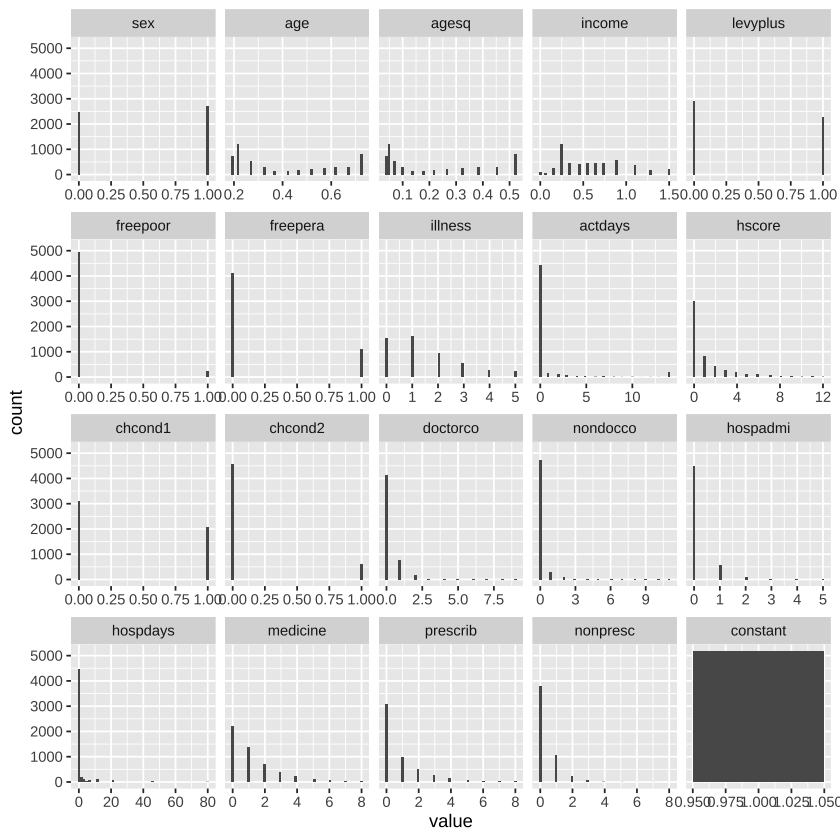

In [10]:
# Assuming 'data' is your dataframe
library(ggplot2)

# Melt the data into a format suitable for ggplot
data_melted <- reshape2::melt(data)

# Plot histograms for all columns
ggplot(data_melted, aes(value)) + 
  geom_histogram(bins=50) + 
  facet_wrap(~variable, scales='free_x')

- sex: The distribution is bimodal with two values representing male (0) and female (1). The central tendency is not applicable since this is a nominal variable. The data is not spread but concentrated on two values. There are no outliers or gaps as it is a categorical variable.

- age: The distribution is slightly right-skewed. The central tendency would likely be between 0.2 and 0.3 (roughly 20-30 years old when multiplied back by 100). The spread seems to be from approximately 0.15 to 0.7, with few individuals older than 70. There are no clear outliers, but there's a notable drop in frequency after 0.5.

- agesq: The distribution is right-skewed, as expected since it's the square of age. Central tendency and spread are not directly interpretable without transformation. No outliers are noticeable, and the skewness is due to the nature of the squared term.

- income: The distribution is highly right-skewed with many individuals at the lower income range and few at the higher. The central tendency would be on the lower end, and the spread is quite large, but the bulk of the data is concentrated below 1.5. There are some individuals in the highest income category, which are notable.

- levyplus: The distribution is bimodal with most individuals not covered by private health insurance. No central tendency or spread is relevant due to the dichotomous nature of the data.

- freepoor: Similar to "levyplus," this is a bimodal distribution with most individuals not covered by government due to low income. Central tendency and spread are not relevant for the same reasons.

- freepera: This histogram also shows a bimodal distribution with the majority not covered for free by government because of old-age or disability pension. No central tendency or spread is relevant.

- illness: The distribution is right-skewed with most individuals reporting 0 or 1 illness in the past 2 weeks. The central tendency is close to 0, and there's a small spread with few outliers.

- actdays: Highly right-skewed distribution with most data points at 0, indicating most individuals had no days of reduced activity. Some outliers have up to 12.5 days.

- hscore: The distribution seems to be multi-modal, indicating different peaks of health score values. It's slightly right-skewed with a concentration of values at the lower end, indicating better general health.

- chcond1 and chcond2: Both histograms are similar, with a large majority of individuals not having chronic conditions affecting their activity. The data is concentrated at 0, with no spread or central tendency of interest.

- doctorco: Highly right-skewed distribution, with most individuals having 0 or 1 consultation with a doctor in the past 2 weeks. Central tendency is near 0, with a spread up to 8 consultations.

- nondocco: This distribution is also right-skewed, with most individuals not consulting non-doctor health professionals. The spread is small, with a few going up to 10 consultations.

- hospadmi: Most individuals have not been admitted to a hospital, as shown by the concentration at 0. It's right-skewed with a small number of cases having multiple admissions.

- hospdays: Similar to "hospadmi," it's right-skewed with most individuals having 0 nights in a hospital, and a small spread with few cases having more nights.

- medicine: Right-skewed distribution, indicating that most individuals used 0 or 1 medication in the past 2 days, with a small number using more.

- prescrib: This histogram is right-skewed as well, showing that most individuals had 0 prescribed medications, with a few using more.

- nonpresc: Another right-skewed distribution, most individuals did not use nonprescribed medications, with a range extending up to 6.

- constant: This appears to be a control variable with a single value for all observations, indicating no variability.

Key Observations:

- Skewness:  The majority of your numerical variables and ordinal variables exhibit right-skewness. This means distributions have a long right tail with a few extreme higher values. This is expected for some health-related variables.

- Multimodality: Variable 'hscore' shows multiple, potentially interesting peaks.

- Categorical Variables: Your categorical variables (binary or limited categories) show concentrated distributions.

What Does This Mean For Analysis?

- Transformations: We should consider applying transformations (logarithmic, square root) to  right-skewed numerical variables to make them closer to normal distributions. This might be necessary for certain statistical modeling techniques.

- Non-Parametric Methods: Some statistical tests assume normality. Our distributions might warrant the use of non-parametric alternatives (e.g., Kruskal-Wallis instead of ANOVA).

- Descriptive Statistics: While means and standard deviations will still be useful in describing these variables, we should also report the medians and interquartile ranges (Q25, Q75) since these measures are more robust to the presence of outliers.

- Exploratory Visualizations: Let's consider exploring relationships between variables through scatterplots, boxplots, and correlation matrices. These will help identify potentially relevant predictors for response variable 

## Explore 'doctorco' response variable

To create a plot for the 'doctorco' variable, which has many zeros, a good approach is to use a histogram that includes a log scale for the y-axis. This will allow you to better visualize the distribution of non-zero values.

This code uses ggplot2 to create a histogram with each bar representing a count of records for each number of doctor consultations. The scale_y_log10() function transforms the y-axis to a logarithmic scale, which can make the plot easier to interpret when there are many zeros. Remember to adjust binwidth if needed for better visualization.

* **Discrete and Count-Based:**  'doctorco' is a count variable (representing the number of doctor consultations). It's also non-negative and discrete (takes on whole number values).

* **Potential Modeling:​​**   Statistical models such as Poisson regression or Negative Binomial regression are particularly suitable for this type of response variable. 


Caricamento pacchetto: 'gridExtra'


Il seguente oggetto `e mascherato da 'package:dplyr':

    combine


Warning message:
"Transformation introduced infinite values in continuous y-axis"
Warning message:
"Removed 9 rows containing missing values (`geom_bar()`)."


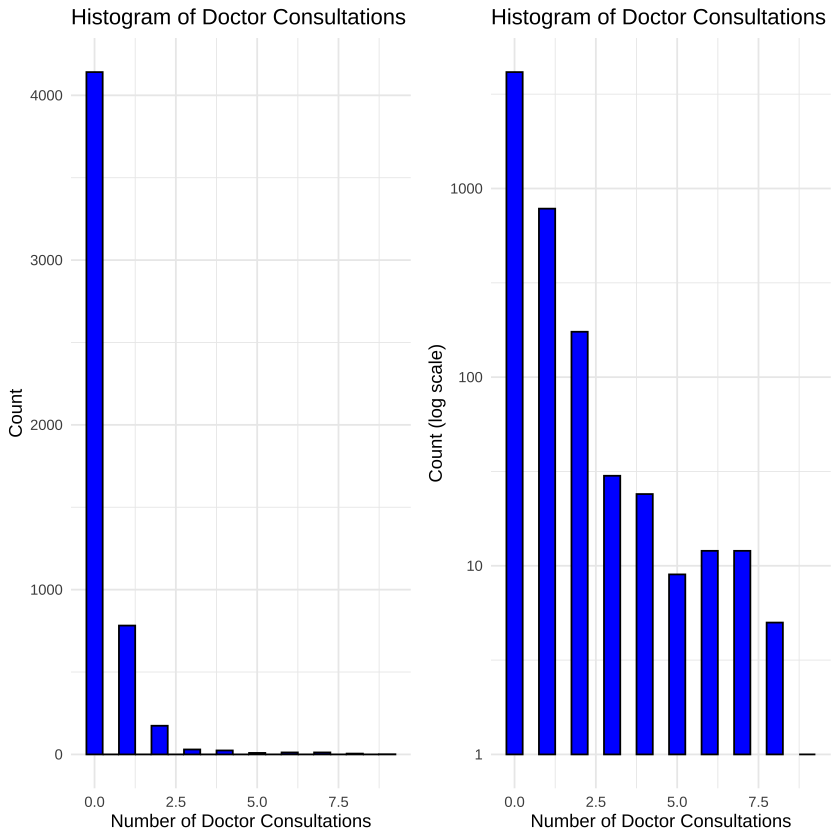

In [11]:
# Load the necessary packages
library(ggplot2)
library(gridExtra)

# Create the first histogram
p1 <- ggplot(health_data, aes(x = doctorco)) +
  geom_histogram(binwidth = 0.5, fill = "blue", color = "black") +
  theme_minimal() +
  labs(title = "Histogram of Doctor Consultations",
       x = "Number of Doctor Consultations",
       y = "Count")

# Create the second histogram with a log scale for the y-axis
p2 <- ggplot(health_data, aes(x = doctorco)) +
  geom_histogram(binwidth = 0.5, fill = "blue", color = "black") +
  scale_y_log10() +
  theme_minimal() +
  labs(title = "Histogram of Doctor Consultations",
       x = "Number of Doctor Consultations",
       y = "Count (log scale)")

# Combine the two plots
grid.arrange(p1, p2, ncol=2)

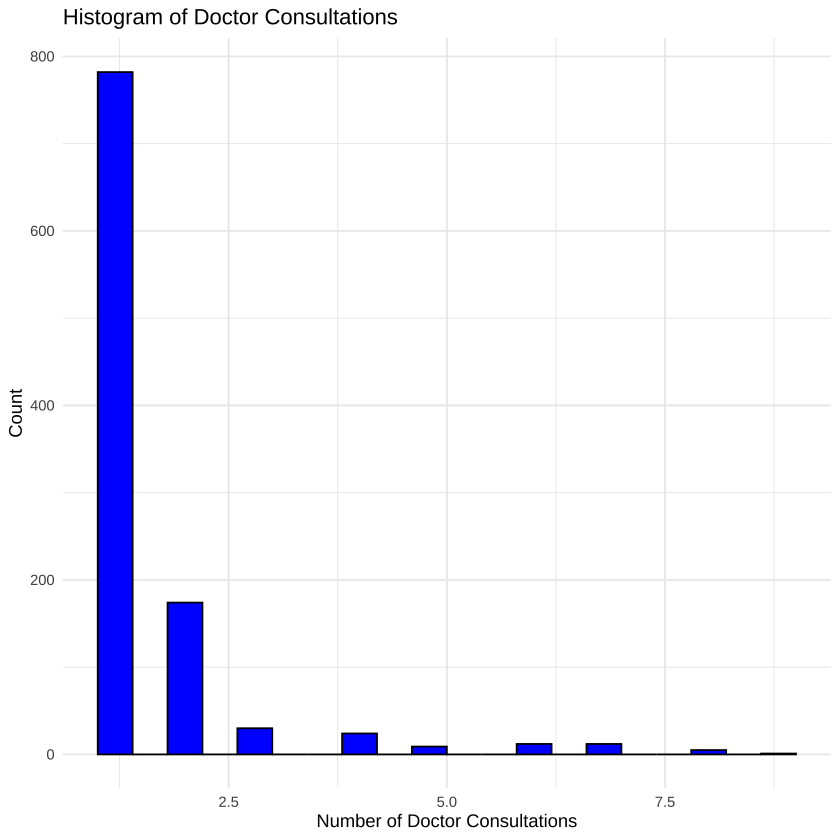

In [18]:
# Create a new dataframe
df <- data.frame(doctorco_nz = health_data$doctorco[health_data$doctorco > 0.9])

# Histogram of doctorco_nz
ggplot(df, aes(x = doctorco_nz)) +
  geom_histogram(binwidth = 0.4, fill = "blue", color = "black") +
  theme_minimal() +
  labs(title = "Histogram of Doctor Consultations",
       x = "Number of Doctor Consultations",
       y = "Count")
  

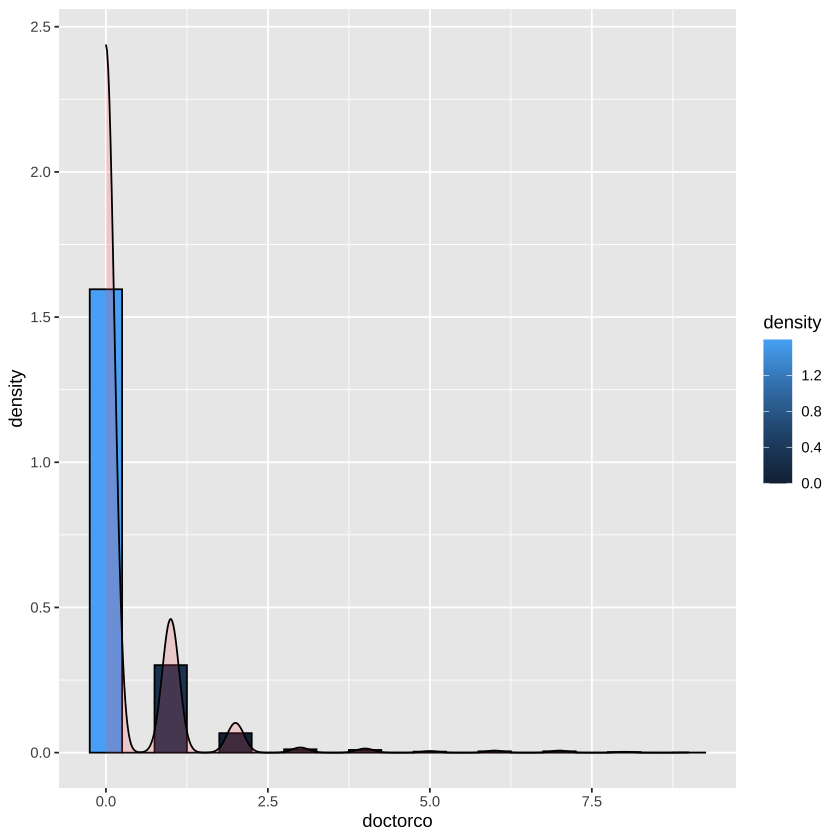

In [58]:
library(ggplot2)
#library(gridExtra)

ggp1 <- ggplot(health_data, aes(x = doctorco)) +
  geom_histogram(aes(y = after_stat(density), fill = after_stat(density)),
                 binwidth = .5, colour = "black") +
  geom_density(alpha = .2, fill = "#FF6666")

# ggp2 <- ggplot(health_data, aes(x = doctorco)) +
#   geom_histogram(aes(y = after_stat(density), fill = after_stat(density)),
#                  binwidth = .3, colour = "black") +
#   geom_density(alpha = .2, fill = "#FF6666") +
#   scale_y_log10() +
#   theme_minimal() +
#   labs(title = "Histogram of Doctor Consultations ('doctorco')",
#        x = "Number of Doctor Consultations",
#        y = "Count (log scale)")


#grid.arrange(ggp1, ggp2, ncol=2)

print(ggp1)


1. Left Histogram (Linear Scale):

- Shape: The distribution is highly right-skewed.
- Central Tendency: The mode is at 0 consultations, which is the highest bar, suggesting that most people did not have any consultations.
- Spread: The data is spread from 0 to a little over 8 consultations, with the majority of data concentrated at 0.
- Notable Features: There is a rapid decline in the frequency of consultations after 0. There are no consultations reported above 8 or 9, and no outliers are visible.

2. Right Histogram (Logarithmic Scale):

- Shape: When using the logarithmic scale, the right-skew is still visible, but the distribution appears more spread out, making it easier to observe the counts for higher numbers of consultations.
- Central Tendency: The mode remains at 0 consultations, as it is the tallest bar on the log scale as well.
- Spread: The spread is the same as in the linear scale, but the less frequent occurrences are more visible due to the log scale.
- Notable Features: The use of the log scale reveals the pattern of decrease in frequency as the number of consultations increases. It also allows for easier visualization of counts for higher numbers of consultations, which are compressed in the linear scale.

**Interpretation** :

- Zero-Inflated Data:  Your data have many cases with zero counts (people with no doctor consultations). This phenomenon often requires specialized modeling (e.g., zero-inflated Poisson models).

- Transformation Benefits: The logarithmic scale  highlights the distribution's finer details better, making those less frequent values stand out more. However, because of the zero counts, using it directly won't allow for a 'traditional' log transform without handling zeros strategically.

**Boxplots:** Investigate how 'doctorco' is distributed across different categorical variables: 
- 'doctorco'  by 'sex'
- 'doctorco' by 'levyplus'
- 'doctorco' by 'chcond1'
- 'doctorco' by 'chcond2'

 **Scatterplots:**   Check potential associations  between 'doctorco' and numerical variables (Consider transforming skewed numerical variables before  making these plots as linear-type trends  are easier to detect with transformed data.):
- 'doctorco' vs. 'age'
- 'doctorco' vs. 'income'
- 'doctorco' vs. 'hscore'
- 'doctorco' vs. 'actdays'

## Visualization Exploration

Here are some visualization ideas focused on  exploring potential relationships between  'doctorco' and other variables. 

### Visualizing Relationships with Boxplots

Warning message:
"Transformation introduced infinite values in continuous y-axis"
Warning message:
"Removed 4141 rows containing non-finite values (`stat_boxplot()`)."


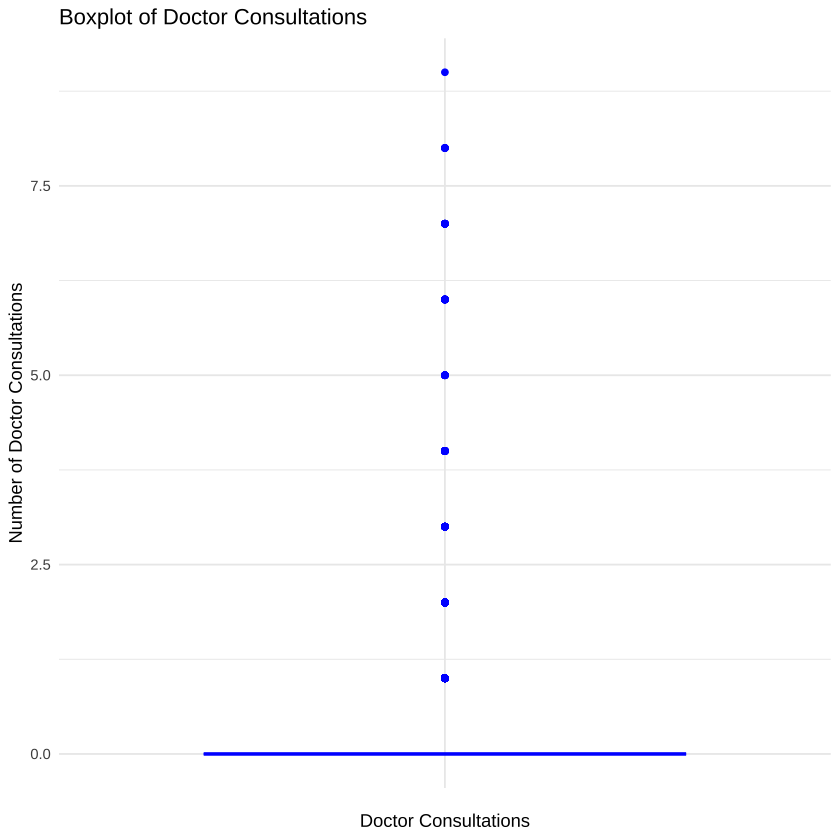

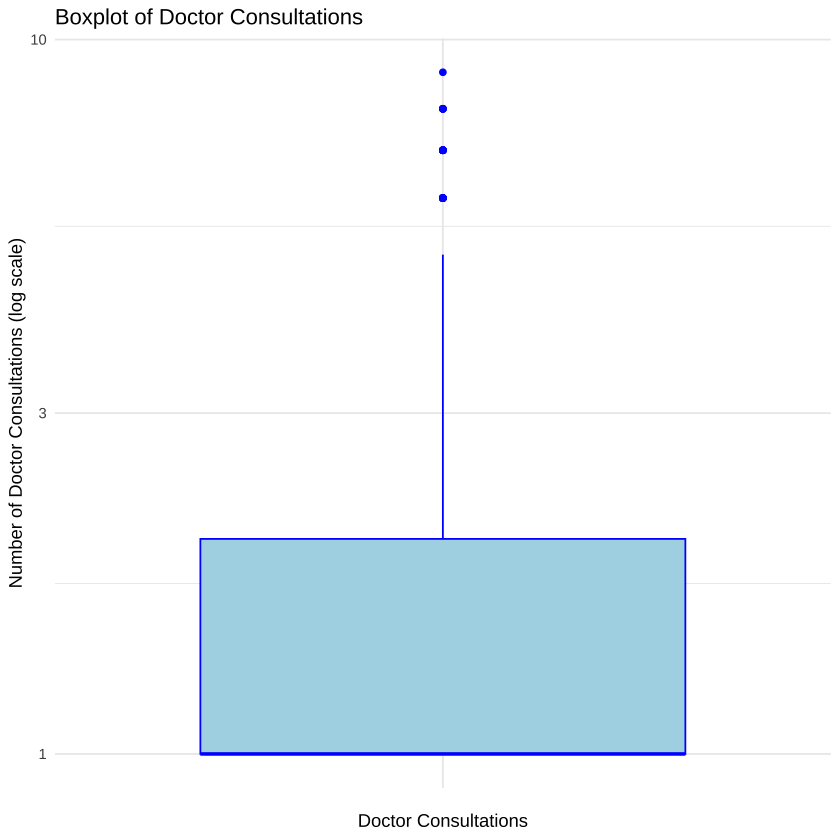

In [59]:
# Load the necessary packages
library(ggplot2)

# Create a boxplot of doctorco
ggplot(health_data, aes(x = "", y = doctorco)) +
  geom_boxplot(fill = "lightblue", color = "blue") +
  theme_minimal() +
  labs(title = "Boxplot of Doctor Consultations",
       x = "Doctor Consultations",
       y = "Number of Doctor Consultations")

# Create a boxplot of doctorco with a log scale for the y-axis
ggplot(health_data, aes(x = "", y = doctorco)) +
  geom_boxplot(fill = "lightblue", color = "blue") +
  scale_y_log10() +
  theme_minimal() +
  labs(title = "Boxplot of Doctor Consultations",
       x = "Doctor Consultations",
       y = "Number of Doctor Consultations (log scale)")

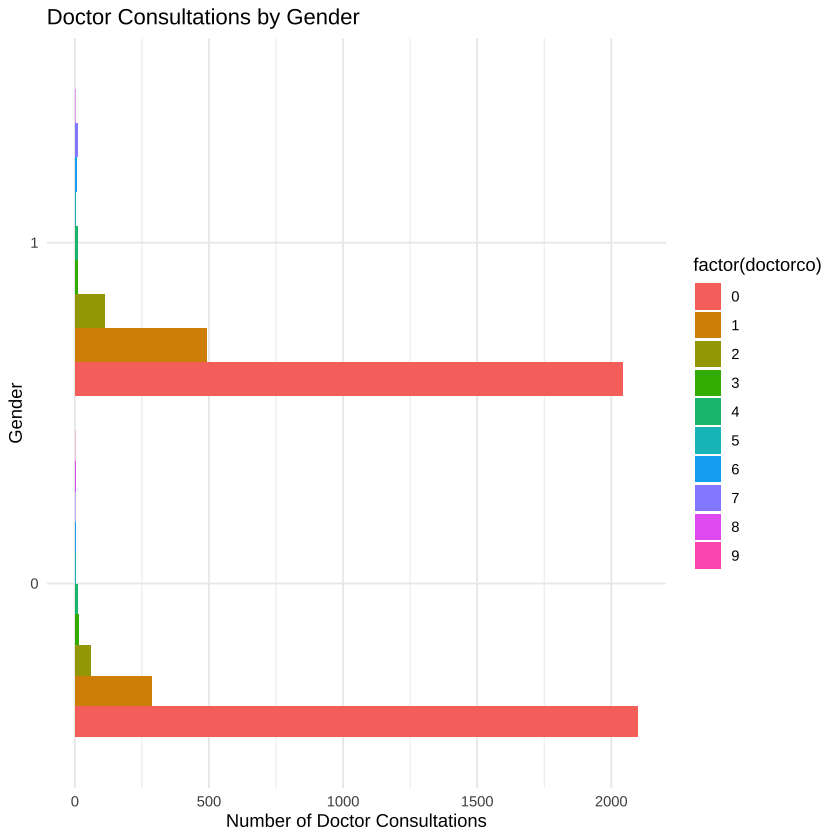

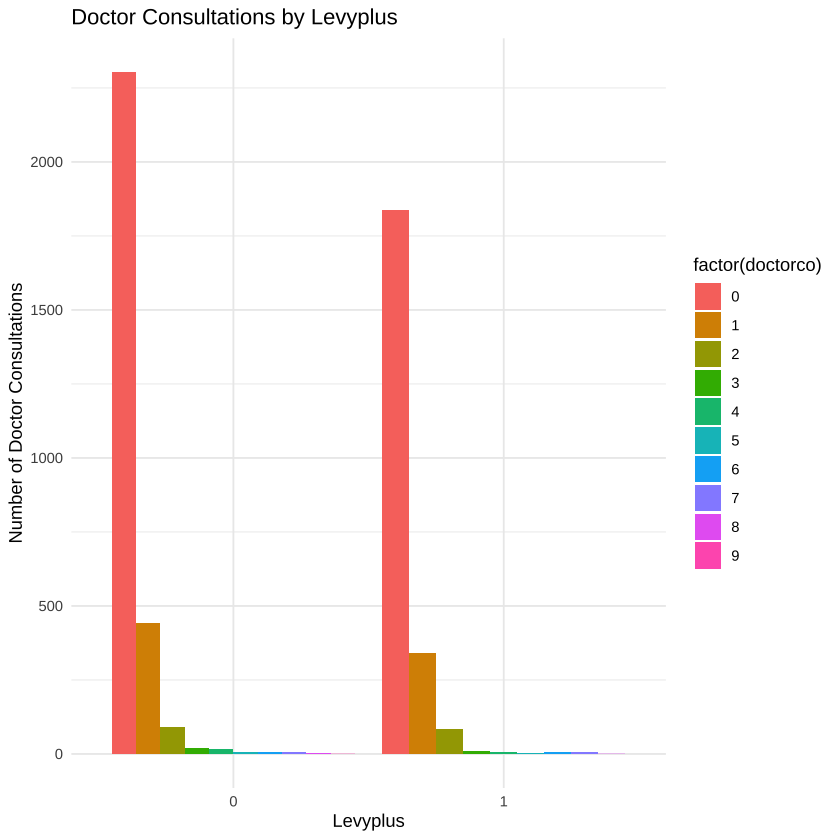

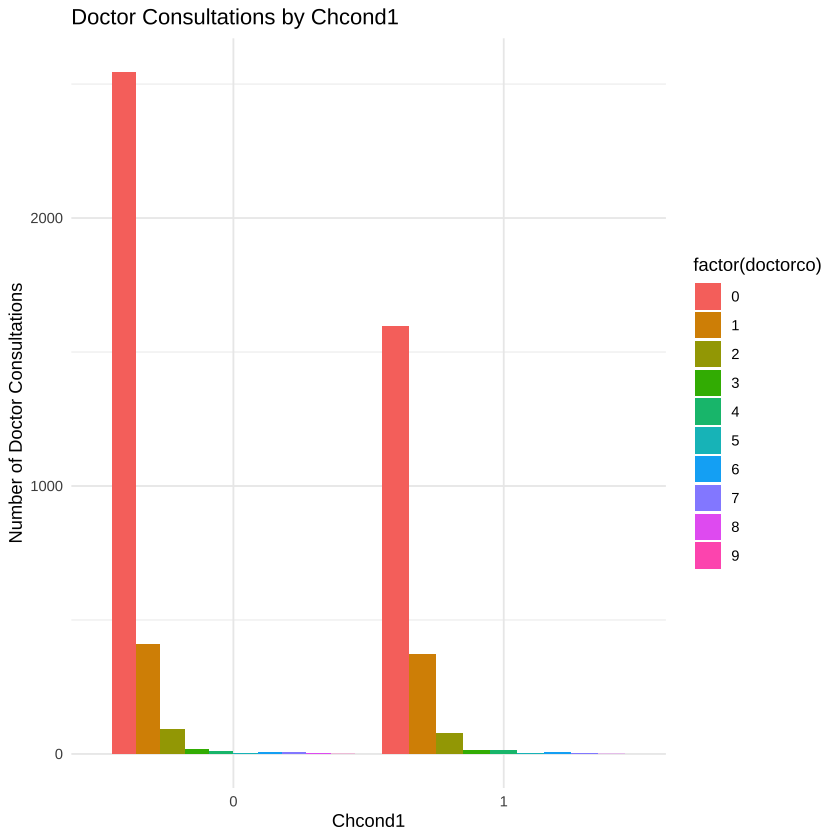

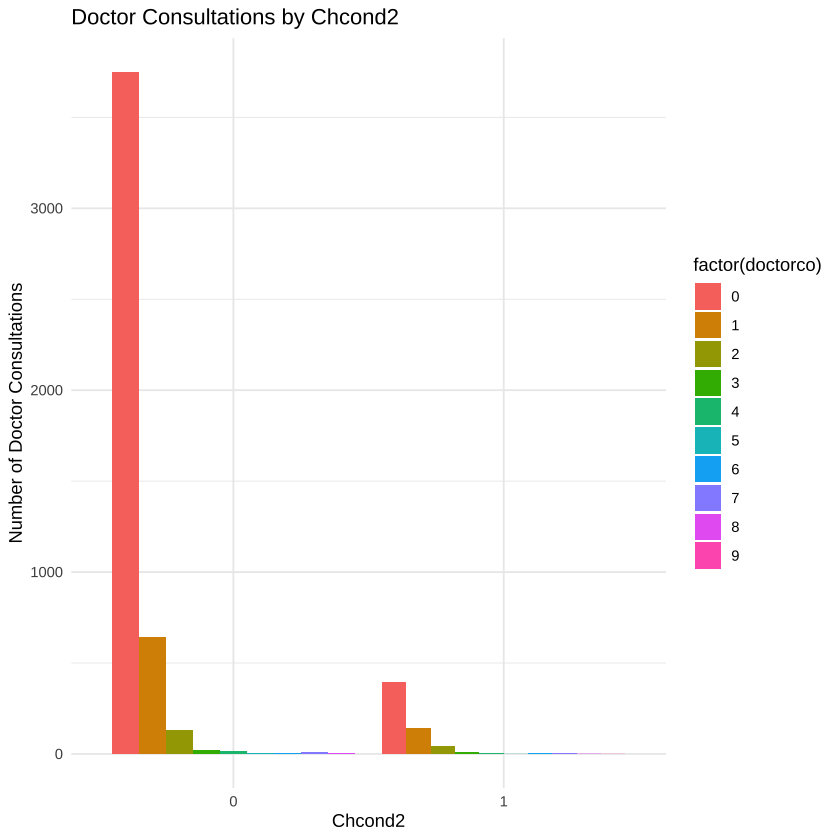

In [63]:
# Doctor Consultations by Sex
ggplot(health_data, aes(x = factor(sex), fill = factor(doctorco), group = factor(doctorco))) + 
  geom_bar(position = "dodge") +
  coord_flip() +  # This flips the axes
  theme_minimal() +
  labs(title = "Doctor Consultations by Gender",
       x = "Gender",
       y = "Number of Doctor Consultations")

# Doctor Consultations by Levyplus
ggplot(health_data, aes(x = factor(levyplus), fill = factor(doctorco), group = factor(doctorco))) + 
  geom_bar(position = "dodge") +
  theme_minimal() +
  labs(title = "Doctor Consultations by Levyplus",
       x = "Levyplus",
       y = "Number of Doctor Consultations")

# Doctor Consultations by Chcond1
ggplot(health_data, aes(x = factor(chcond1), fill = factor(doctorco), group = factor(doctorco))) + 
  geom_bar(position = "dodge") +
  theme_minimal() +
  labs(title = "Doctor Consultations by Chcond1",
       x = "Chcond1",
       y = "Number of Doctor Consultations")

# Doctor Consultations by Chcond2
ggplot(health_data, aes(x = factor(chcond2), fill = factor(doctorco), group = factor(doctorco))) + 
  geom_bar(position = "dodge") +
  theme_minimal() +
  labs(title = "Doctor Consultations by Chcond2",
       x = "Chcond2",
       y = "Number of Doctor Consultations")


`summarise()` has grouped output by 'sex'. You can override using the `.groups`
argument.


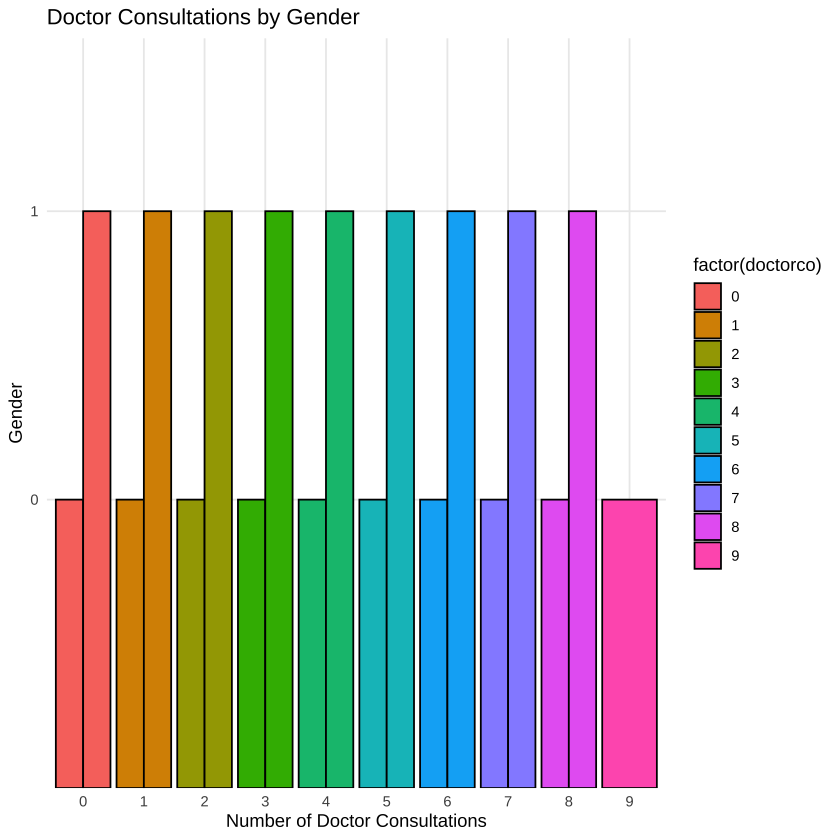

In [66]:
#another test

# Calculate the count for each combination of 'doctorco' and 'sex'
health_data_summary <- health_data %>%
  group_by(sex, doctorco) %>%
  summarise(count = n())

# Doctor Consultations by Gender with 'doctorco' on x-axis and 'sex' on y-axis
ggplot(health_data_summary, aes(x = factor(doctorco), y = factor(sex), fill = factor(doctorco))) + 
  geom_bar(stat = "identity", position = "dodge", colour = "black") +
  theme_minimal() +
  labs(title = "Doctor Consultations by Gender",
       x = "Number of Doctor Consultations",
       y = "Gender")
# not what I want, RIP

In [67]:
# ## Plotting distributions of key variables

# # Age distribution
# ggplot(health_data, aes(x = age)) +
#   geom_histogram(bins = 30, fill = "blue", color = "black") +
#   labs(title = "Age Distribution", x = "Age", y = "Count")

# # Income distribution
# ggplot(health_data, aes(x = income)) +
#   geom_histogram(bins = 30, fill = "green", color = "black") +
#   labs(title = "Income Distribution", x = "Income", y = "Count")

# # Doctor consultations (target variable)
# ggplot(health_data, aes(x = doctorco)) +
#   geom_histogram(bins = 30, fill = "red", color = "black") +
#   labs(title = "Doctor Consultations Distribution", x = "Doctor Consultations", y = "Count")


### Exploring relationships and patterns in the data

1. Scatter Plots for Continuous Variables: Investigate relationships between continuous variables, such as age and income, and their relationship with the number of doctor consultations.

In [ ]:
#### NEED TO BE IMPLEMENTED OR BETTER USE CORRELATION MATRIX!!

# Get all the column names except for 'doctorco'
features <- colnames(health_data)[!colnames(health_data) %in% "doctorco"]

# Loop over each feature and create a plot
for (feature in features) {
  print(
    ggplot(health_data, aes(y = feature, x = doctorco, group = factor(feature))) + 
      geom_point() + 
      labs(y = feature, x = "Doctor Consultations (doctorco)")
  )
}



In [68]:
# ##### NEED TO IMPLEMENT
# library(gridExtra)

# # Relationship between age and doctor consultations
# ggp1 <- ggplot(health_data, aes(x = chcond1, y = doctorco)) +
#   geom_point(aes(color = factor(chcond1)), alpha = 0.5) +
#   labs(title = "Doctor Consultations vs Chronic condition 1", x = "chcond1", y = "Doctor Consultations")

# # Relationship between income and doctor consultations
# ggp2 <- ggplot(health_data, aes(x = chcond2, y = doctorco)) +
#   geom_point(aes(color = factor(chcond2)), alpha = 0.5) +
#   labs(title = "Doctor Consultations vs Chronic condition 2", x = "chcond2", y = "Doctor Consultations")

# #plot the two graphs side by side
# grid.arrange(ggp1, ggp2, ncol=2)

## Correlation matrix

corrplot 0.92 loaded



Warning message in cor(health_data):
"la deviazione standard `e zero"
Warning message in cor(data):
"la deviazione standard `e zero"


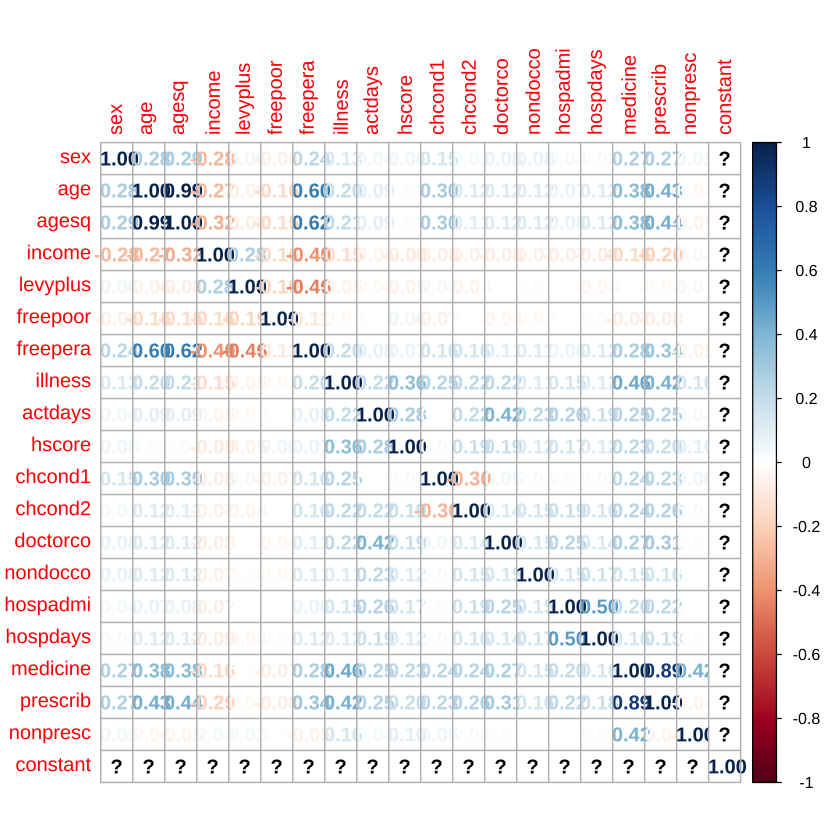

                 sex         age       agesq      income     levyplus
sex       1.00000000  0.28113610  0.28930631 -0.27660633  0.056389761
age       0.28113610  1.00000000  0.99176269 -0.27107338 -0.057104546
agesq     0.28930631  0.99176269  1.00000000 -0.31633011 -0.076060429
income   -0.27660633 -0.27107338 -0.31633011  1.00000000  0.277610667
levyplus  0.05638976 -0.05710455 -0.07606043  0.27761067  1.000000000
freepoor -0.06018682 -0.16154084 -0.15287596 -0.16147146 -0.188434995
freepera  0.23570038  0.60481696  0.61890381 -0.40253173 -0.459885042
illness   0.13481427  0.20498389  0.21042369 -0.14881155 -0.046721941
actdays   0.04104591  0.09474494  0.09395412 -0.04754529 -0.029896214
hscore    0.05741953  0.01861580  0.01562412 -0.08579045 -0.050384687
chcond1   0.15400903  0.29590973  0.29532506 -0.07782258  0.033779890
chcond2   0.03007880  0.12106398  0.10742750 -0.06548577 -0.044577984
doctorco  0.07863654  0.12453676  0.12486269 -0.07683983 -0.007964117
nondocco  0.07593675

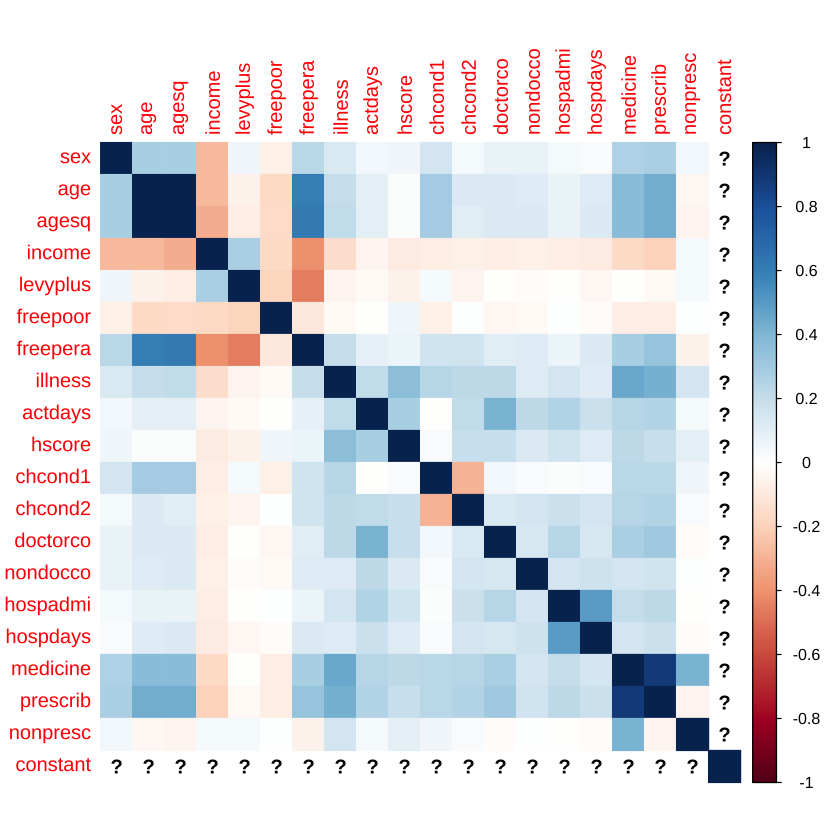

In [21]:
# Correlation heatmap
library(corrplot)
corr_matrix <- cor(health_data)
corr_matrix2 <- cor(data)

corrplot(corr_matrix, method = "number",
#addCoefasPercent = TRUE
)
corrplot(corr_matrix2, method = "number",)
corrplot(corr_matrix2, method = "color")
corrplot(corr_matrix, method = "color")
print(corr_matrix)
print(corr_matrix2)

Warning message in cor(health_data):
"la deviazione standard `e zero"


Warning message in cor(data):
"la deviazione standard `e zero"


$corr
                 sex          age       agesq      income     levyplus
sex       0.50000000  0.140568052  0.14465315 -0.13830316  0.028194880
age       0.14056805  0.500000000  0.49588134 -0.13553669 -0.028552273
agesq     0.14465315  0.495881344  0.50000000 -0.15816506 -0.038030215
income   -0.13830316 -0.135536690 -0.15816506  0.50000000  0.138805334
levyplus  0.02819488 -0.028552273 -0.03803021  0.13880533  0.500000000
freepoor -0.03009341 -0.080770422 -0.07643798 -0.08073573 -0.094217498
freepera  0.11785019  0.302408482  0.30945191 -0.20126587 -0.229942521
illness   0.06740714  0.102491947  0.10521184 -0.07440578 -0.023360970
actdays   0.02052296  0.047372468  0.04697706 -0.02377265 -0.014948107
hscore    0.02870977  0.009307898  0.00781206 -0.04289522 -0.025192343
chcond1   0.07700451  0.147954864  0.14766253 -0.03891129  0.016889945
chcond2   0.01503940  0.060531989  0.05371375 -0.03274288 -0.022288992
doctorco  0.03931827  0.062268381  0.06243135 -0.03841991 -0.003982059


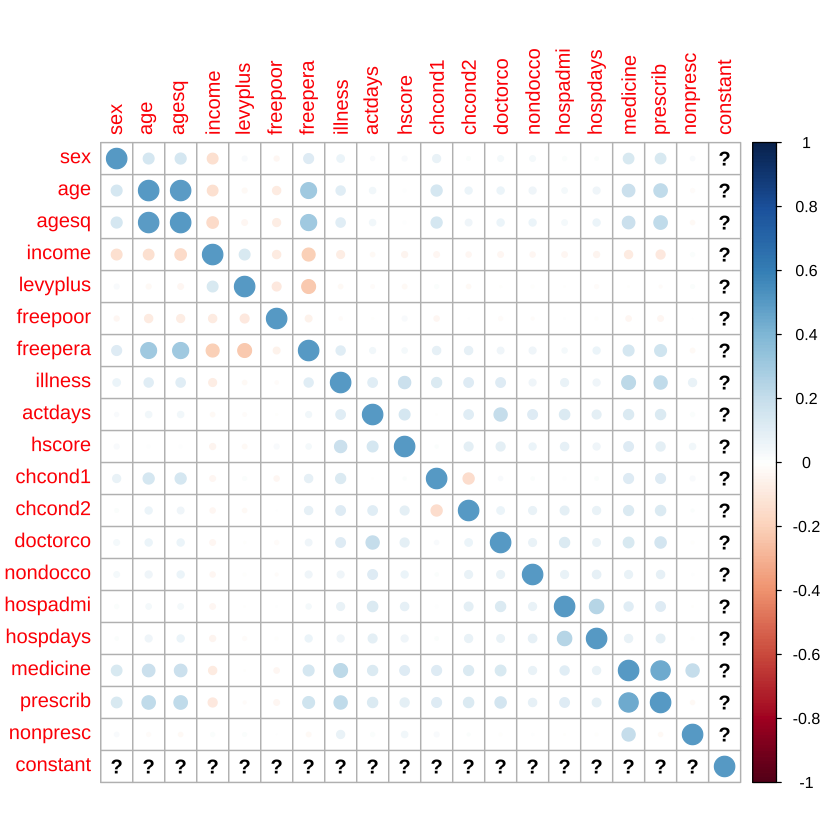

In [31]:
M = cor(health_data)
M2 = cor(data)

print(corrplot(M/2))

print(corrplot(M2/2))

print(M, M2)

In [34]:
corrplot(M, p.mat = testRes$p, method = 'color', diag = FALSE, type = 'upper',
         sig.level = c(0.001, 0.01, 0.05), pch.cex = 0.9,
         insig = 'label_sig', pch.col = 'grey20', order = 'AOE')

ERROR: Error in eigen(corr): valori infiniti o assenti in 'x'


**Understanding Correlation Coefficients**:

- Sign:
  - Positive values indicate a potential positive linear relationship (as one variable increases, the other tends to increase).
  - Negative values indicate an inverse or negative linear relationship (as one variable increases, the other tends to decrease).
- Magnitude:
  - The closer the absolute value of the coefficient is to 1, the stronger the linear relationship.
  - A coefficient near 0 indicates little to no linear association.

**Key Observations (Focusing on 'doctorco')**

- Positive Correlations:  'doctorco' seems to have the strongest positive linear correlations with:

 - 'prescrib' (prescribed medications)
 - 'medicine' (total medications)
 - 'nondocco' (consultations with non-doctor health professionals)
 - 'actdays' (days with reduced activity)

A higher number of doctor consultations could be expected to correlate with greater prescription counts, medicine use, and potentially other healthcare professional visits. Interestingly, increased days of reduced activity may also accompany greater interactions with healthcare.

**Weak & Potential Inverse Correlations:**  'doctorco' seems to have weaker or potentially  inverse correlations with:

- 'age' (slightly positive)
- 'hscore' (poor health score) (slightly positive)
- 'income' (negative)

**Important considerations:**

- Statistical Significance: We still need to check if these correlations are statistically significant - meaning is the observed relationship reliable enough to rule out it being caused by random chance. This often involves looking at p-values.
- Type of Correlation: You used Pearson's correlation, which focuses on linear relationships. If a variable behaves in a non-linear manner with 'doctorco,' it would have escaped our current analysis. For variables like 'chcond1' and 'chcond2', Spearman's correlation might be more appropriate.
- Causation vs. Correlation: Remember that correlation doesn't necessarily imply causation. A relationship could be the result of another underlying factor influencing both variables simultaneously. Deeper analysis methods help investigate such possibilities.

**Possible next step(maybe??)**

- Hypothesis Building: Use these correlations to develop possible hypotheses and research questions leading to modeling analysis of 'doctorco'. Which variables seem most promising as predictors?

In [87]:
# Pearson's correlation, use on original variables before transformations
cor(health_data$doctorco, health_data$age)  # Example with 'age'

# Spearman's correlation (If a variable may be better treated as ordinal)
cor(health_data$doctorco, health_data$hscore, method = "spearman") 

[1] 0.1245368

[1] 0.1775238

In [28]:
# Check for columns with zero variance
zero_var_cols <- apply(health_data, 2, var) == 0
print(zero_var_cols)

# Remove columns constant columns
health_data <- health_data[, !zero_var_cols]

# Check for columns with missing values
missing_values <- colSums(is.na(health_data))
print(missing_values)


     sex      age    agesq   income levyplus freepoor freepera  illness 
   FALSE    FALSE    FALSE    FALSE    FALSE    FALSE    FALSE    FALSE 
 actdays   hscore  chcond1  chcond2 doctorco nondocco hospadmi hospdays 
   FALSE    FALSE    FALSE    FALSE    FALSE    FALSE    FALSE    FALSE 
medicine prescrib nonpresc 
   FALSE    FALSE    FALSE 
     sex      age    agesq   income levyplus freepoor freepera  illness 
       0        0        0        0        0        0        0        0 
 actdays   hscore  chcond1  chcond2 doctorco nondocco hospadmi hospdays 
       0        0        0        0        0        0        0        0 
medicine prescrib nonpresc 
       0        0        0 


## Boxplots

Box Plots for Categorical Variables: These plots can show the distribution of doctor consultations across different categories, such as sex, levyplus, freepoor, and chronic conditions.

2. Bar Charts for Binary Variables: Examine the frequency of different binary variables.

`summarise()` has grouped output by 'condition'. You can override using the
`.groups` argument.


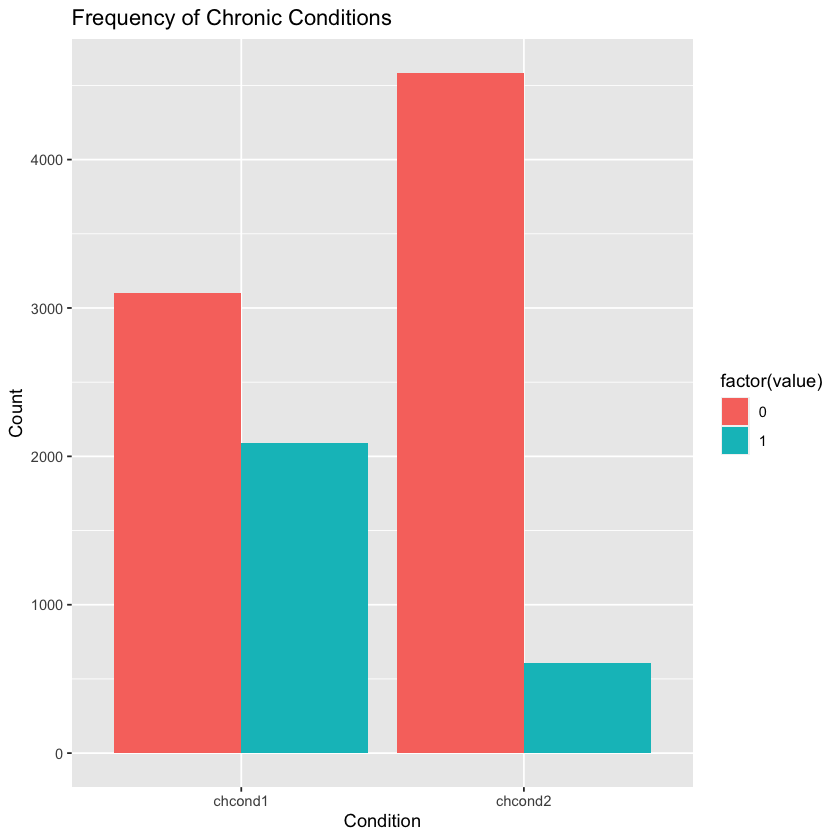

In [16]:
# Frequency of chronic conditions
healthcare_data %>%
  select(chcond1, chcond2) %>%
  gather(key = "condition", value = "value") %>%
  group_by(condition, value) %>%
  summarise(count = n()) %>%
  ggplot(aes(x = condition, y = count, fill = factor(value))) +
  geom_bar(stat = "identity", position = position_dodge()) +
  labs(title = "Frequency of Chronic Conditions", x = "Condition", y = "Count")


Histograms for Health Scores: Understand the distribution of health scores.

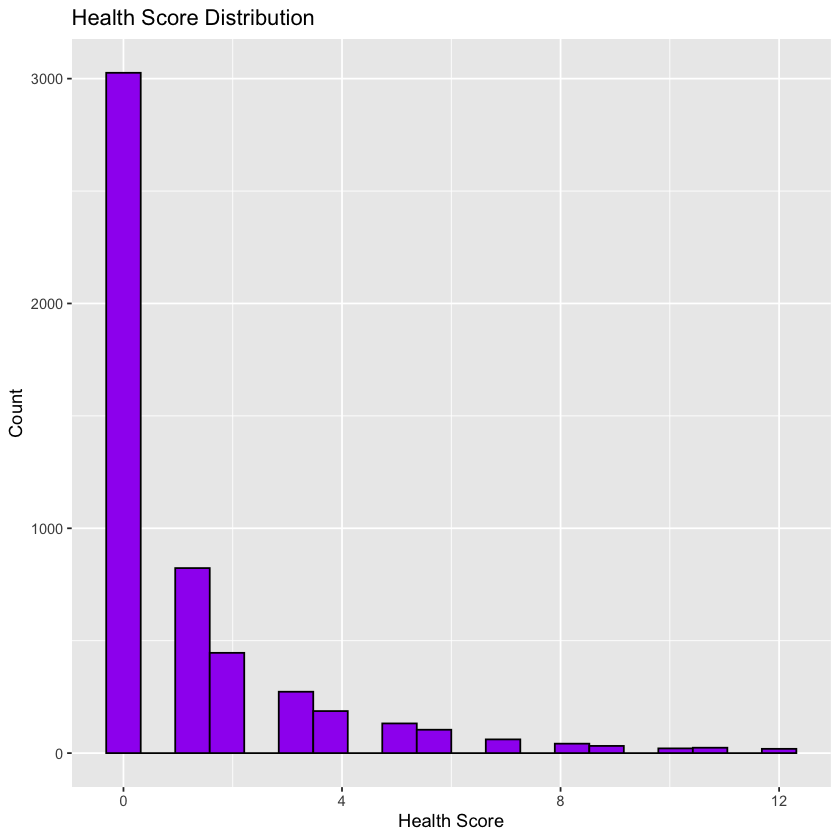

In [20]:
# Health score distribution
ggplot(healthcare_data, aes(x = hscore)) +
  geom_histogram(bins = 20, fill = "purple", color = "black") +
  labs(title = "Health Score Distribution", x = "Health Score", y = "Count")


Pair Plot: Visualize relationships and distributions of multiple variables simultaneously. This can help identify potential patterns and relationships between variables.

In [35]:
# # Selecting a few key variables for pair plot
# selected_data <- healthcare_data %>%
#   select(age, income, freepoor, freepera,  illness, actdays, hscore, chcond1, chcond2, doctorco, hospdays, medicine)

# Pair plot
library(GGally)
# Pair plot with customization
pair_plot <- ggpairs(health_data, #use selected_data for the selected variables
        title = "Pair Plot of Variables",  # Add a title
        lower = list(continuous = wrap("points", alpha = 0.5)),  # Customize lower panel
        upper = list(continuous = wrap("cor", size = 3))  # Customize upper panel
)

# Save the plot as a PNG file
ggsave(filename = "pair_plot.png", plot = pair_plot, width = 20, height = 20)

## Other visualizations

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


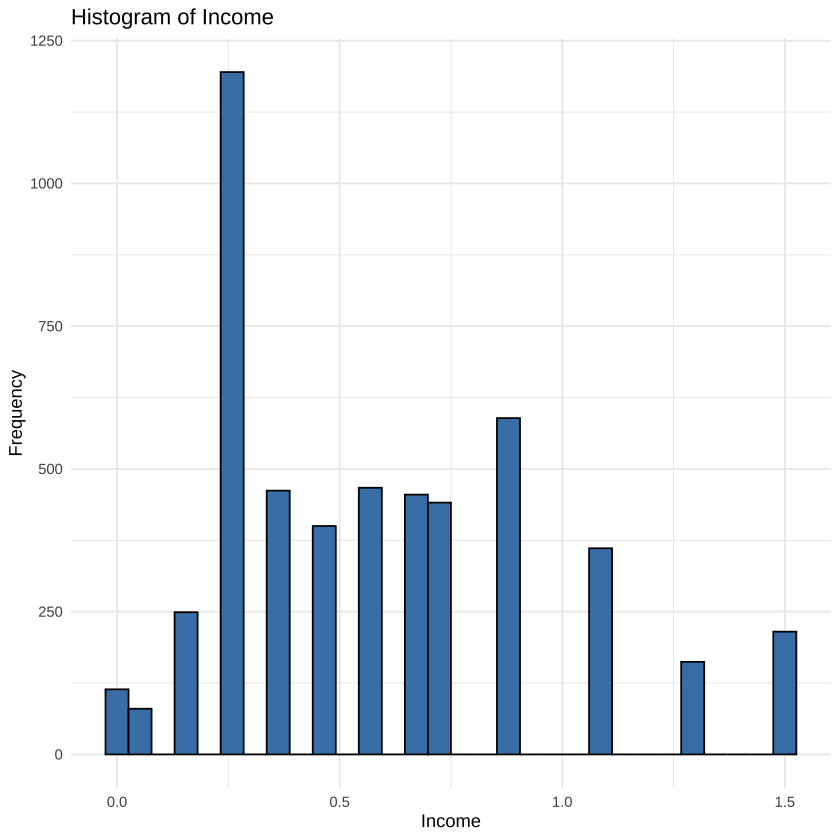

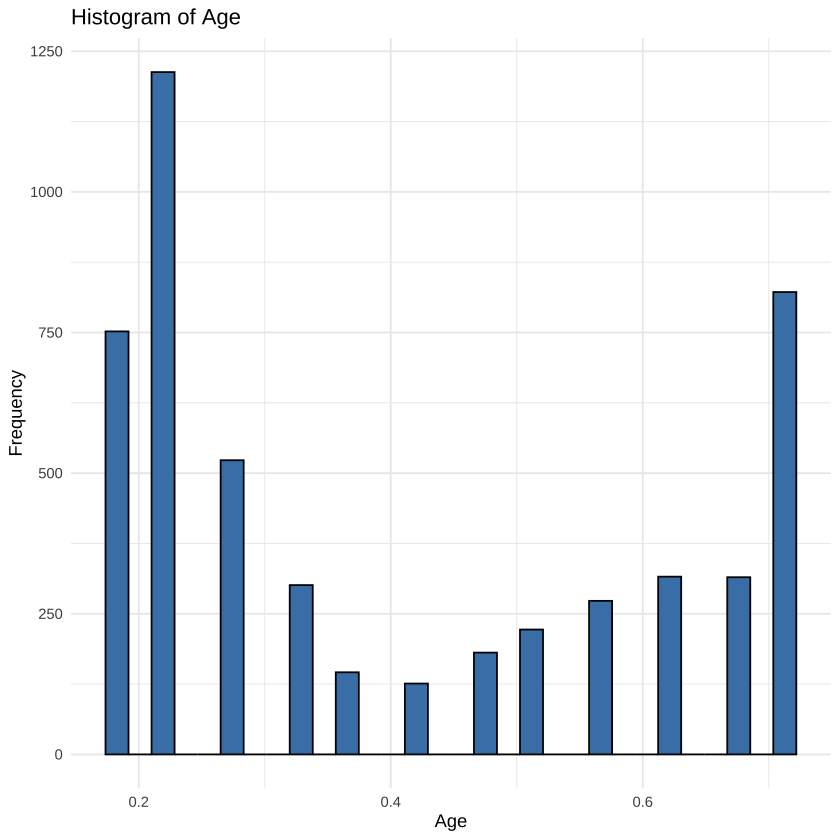

In [42]:
# Basic histogram with a border color
ggplot(health_data, aes(x = income)) +
  geom_histogram(color = "black", fill = "steelblue") +
  labs(x = "Income", y = "Frequency") +
  ggtitle("Histogram of Income") +
  theme_minimal()

ggplot(health_data, aes(x = age)) +
  geom_histogram(color = "black", fill = "steelblue") +
  labs(x = "Age", y = "Frequency") +
  ggtitle("Histogram of Age") +
  theme_minimal() 

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


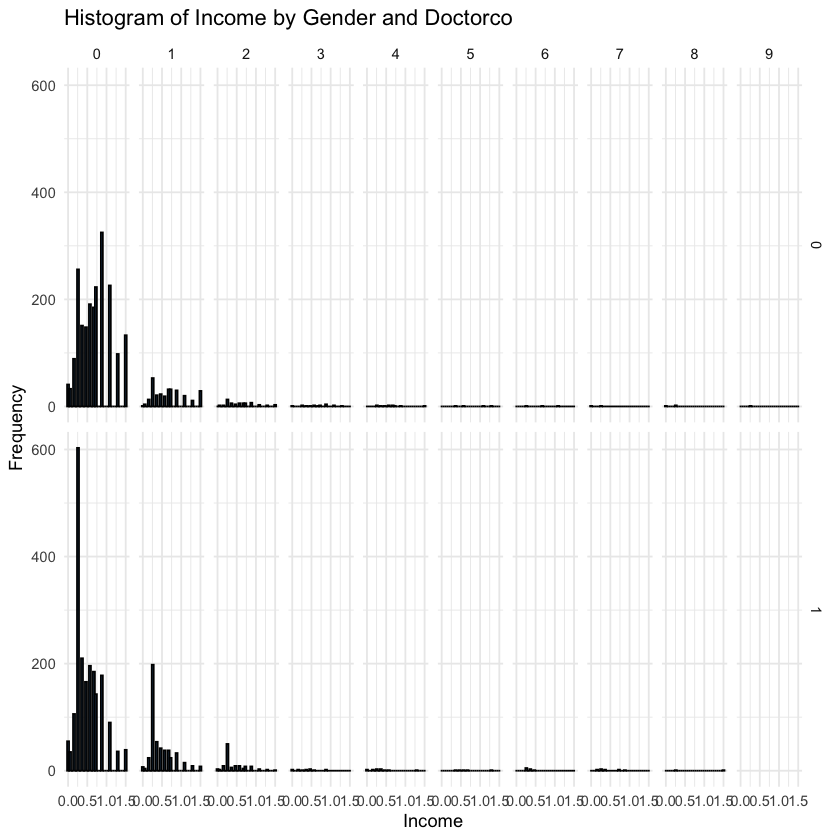

In [37]:
# Histogram with a border color, faceted by gender and doctorco
ggplot(health_data, aes(x = income)) +
  geom_histogram(color = "black", fill = "steelblue") +
  labs(x = "Income", y = "Frequency") +
  ggtitle("Histogram of Income by Gender and Doctorco") +
  facet_grid(sex ~ doctorco) +
  theme_minimal()

## Hypothesis building

Based on the exploratory data analysis, we can develop some initial hypotheses to guide our future analysis. Here are a few examples:

1. Health Conditions: Individuals with chronic conditions (chcond1 and chcond2) may have more doctor consultations than those without chronic conditions.

2. Health Score: Individuals with lower health scores may have more doctor consultations than those with higher health scores.

3. Age: Older individuals may have more doctor consultations than younger individuals.

4. Income: Individuals with lower income may have more doctor consultations than those with higher income.

5. Medication: Individuals who take more prescribed and non-prescribed medications may have more doctor consultations.

6. Activity Days: Individuals with more days of reduced activity may have more doctor

7. Gender: Female individuals may have more doctor consultations than male individuals (this could be investigated using 'sex').

8. Recent Hospitalization: Individuals with a recent hospitalization or multiple hospitalizations (captured by 'hospadmi' and 'hospdays')  may have higher subsequent doctor consultations for follow-up care.



## Conclusion

The exploratory data analysis has provided valuable insights into the dataset. We've identified the distributions of variables, relationships between variables, and potential hypotheses to guide our future analysis. The next steps will involve testing these hypotheses using statistical methods and building predictive models to understand the factors that influence the number of doctor consultations.

## Modeling Doctor Consultations

Since 'doctorco' is a count variable with likely zero-inflation, modeling approaches warrant careful consideration:

- Poisson Regression: A basic starting point for count data. However, its underlying assumptions can often be violated by zero-inflated data.

- Negative Binomial Regression: Another possibility to handle situations where variance exceeds the mean in count data (overdispersion).

- Zero-Inflated Models: Specialized model families, such as zero-inflated Poisson or Zero-Inflated Negative Binomial, account for the excessive zeros within your dataset. We likely need to consider this modeling avenue.

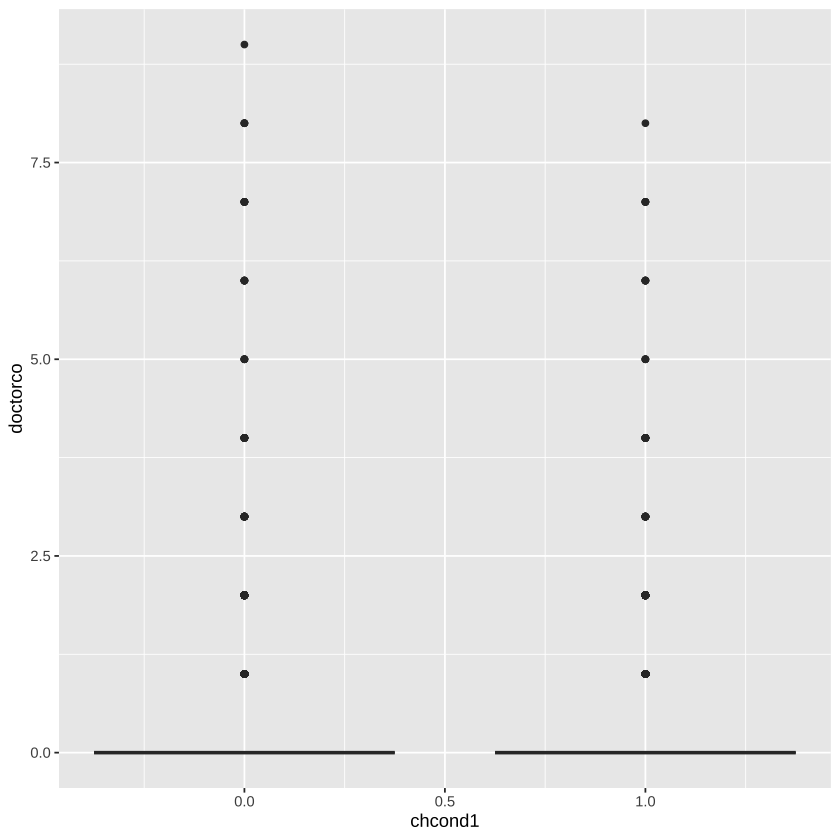


	Welch Two Sample t-test

data:  doctorco by sex
t = -5.7217, df = 5147.2, p-value = 1.114e-08
alternative hypothesis: true difference in means between group 0 and group 1 is not equal to 0
95 percent confidence interval:
 -0.16866063 -0.08257878
sample estimates:
mean in group 0 mean in group 1 
      0.2363344       0.3619541 


[1] 0.1245368


Call:
zeroinfl(formula = doctorco ~ age + income + hscore + chcond1 + sex, 
    data = health_data)

Pearson residuals:
    Min      1Q  Median      3Q     Max 
-1.0844 -0.4684 -0.3567 -0.2895 14.5534 

Count model coefficients (poisson with log link):
            Estimate Std. Error z value Pr(>|z|)    
(Intercept) -0.05512    0.15943  -0.346  0.72957    
age          0.10197    0.22201   0.459  0.64602    
income      -0.39870    0.13688  -2.913  0.00358 ** 
hscore       0.07922    0.01226   6.460 1.05e-10 ***
chcond1     -0.08465    0.09009  -0.940  0.34743    
sex         -0.16965    0.08695  -1.951  0.05103 .  

Zero-inflation model coefficients (binomial with logit link):
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)  2.15268    0.22996   9.361  < 2e-16 ***
age         -1.91801    0.35312  -5.432 5.59e-08 ***
income      -0.35002    0.21020  -1.665   0.0959 .  
hscore      -0.15121    0.02629  -5.751 8.88e-09 ***
chcond1     -0.24672    0.14732  -1.675   0.094

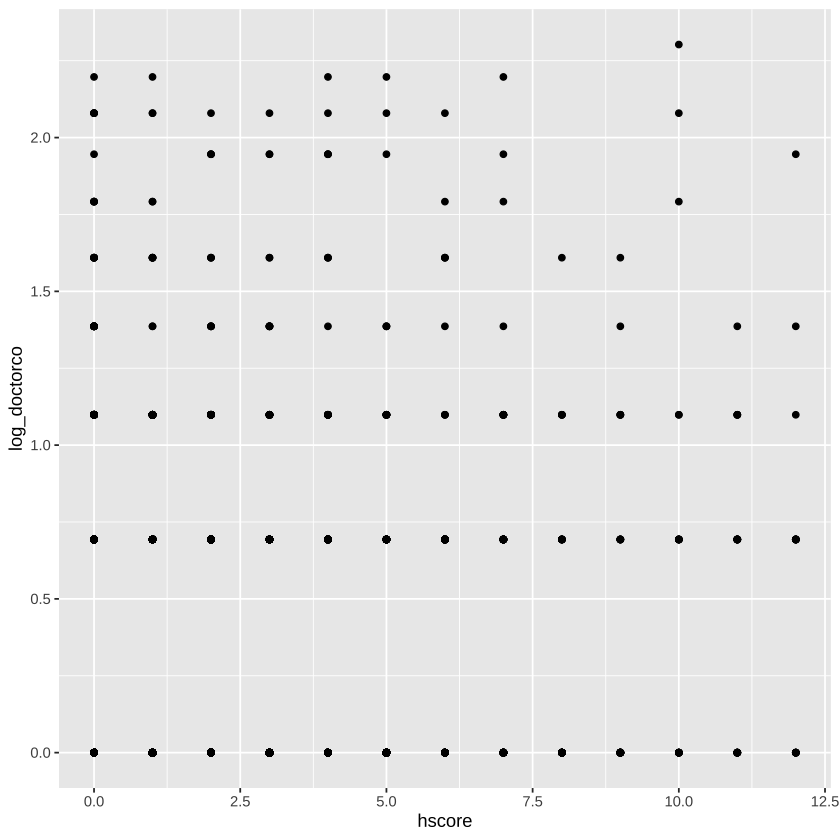

In [89]:
# Visualizations
library(ggplot2) 

ggplot(health_data, aes(x = chcond1, y = doctorco, group = factor(chcond1))) + geom_boxplot() 
# Repeat for other boxplots

# Log transform (adding 1 beforehand to handle zeros in 'doctorco')
health_data$log_doctorco <- log(health_data$doctorco + 1)

ggplot(health_data, aes(x=  hscore, y = log_doctorco)) + geom_point() 
# Repeat for other scatterplots

# Statistical Testing
t.test(doctorco ~ sex, data = health_data)  # Example t-test
cor(health_data$doctorco, health_data$age)  # Example correlation

# Zero-Inflated Model (Example with ZIP)
library(pscl)
zip_model <- zeroinfl(doctorco ~ age + income + hscore + chcond1 + sex, data = health_data)
summary(zip_model)

gpt:::

Part 1: t-test ('doctorco' by 'sex')

Statistically Significant Difference: The p-value of 1.114e-08 is considerably smaller than conventional significance levels (like 0.05 or 0.01). This reveals a statistically significant difference in mean doctor consultations between males and females.
Mean Differences: On average, females (group 1) in your dataset report higher doctor consultations than males (group 0).
Supports Gender Hypothesis: It supports your hypothesis (#7) of potential differences in doctor consultations based on gender.
Part 2: Correlation ('doctorco' & 'age')

Weak Positive Correlation: While positive, the correlation value of 0.1245 signifies a relatively weak linear relationship between the raw 'doctorco' variable and 'age'. Remember, we might observe stronger trends later within transformed and fitted models.
Partial Support for Age Hypothesis: It offers some preliminary support for the idea (#3) that older individuals may potentially have slightly more doctor consultations but suggests age alone won't have strong direct predictive power. More comprehensive modeling will provide finer clarity.
Part 3: Zero-Inflated Poisson (ZIP) Model Output

Let's dissect the key sections of the model summary :

Count Model Coefficients (Predicting  Levels of Consultations)

Income: Individuals with lower income appear to have more doctor consultations, as indicated by the negative coefficient, supporting hypothesis #4.
Health Score: A stronger association exists between worsened health score ('hscore') and increased doctor consultations, supporting hypothesis #2.
Other Factors: The effects of age, chronic conditions ('chcond1'), and gender appear smaller within the zero-inflated model setting and do not reach a level of statistical significance. But these may play important roles with other adjustments included in the future.
Zero Inflation Model Coefficients (Modeling Presence of Zeros)

Highly Significant Variables: Age, health score, gender, and income all seem to play a vital role in predicting individuals likely to have zero doctor consultations (as represented by negative coefficients here)
Interpretation: For example, higher health scores (indicating poor health) likely reduce the chance of individuals reporting zero consultations
Overall  Takeaways

Zero-Inflated Model Seems Promising: Your data is a strong candidate for zero-inflated modeling due to the high number of observations with no doctor consultations!
Hypothesis Support: Your model partially supports hypotheses 2, 4, and 7. This highlights the value of more complex modeling methods with this type of data vs. relying solely on correlations and basic statistical tests.
Suggestions for Next Steps:

Visualization with Zeros: Create histograms or similar  visualizations  to represent the zero-inflated nature of 'doctorco.' This visual clarity  helps interpret the model outcome in context.

Potential Model  Refinement: Could other additional variables improve the model? Maybe interactions between existing variables might improve explanations  and prediction? We can revisit such avenues after interpreting the  current model and addressing possible issues.

Overdispersion  Check: It might be essential to assess overdispersion measures. If evidence suggests so, we might investigate a zero-inflated negative binomial model (ZINB).

In [ ]:
#Zero inflated logistic regression model

# Load the necessary packages
library(pscl)

# Fit the model
zeroinfl_model <- zeroinfl(doctorco ~ age + income + hscore

In [95]:

# Load the package
library(pscl)
#model <- zeroinfl(doctorco ~ . | 1, data = health_data, dist = "poisson", link = "logit") 
fn <- function(par, y, X) {
  lambda <- exp(X %*% par[1:ncol(X)])
  psi <- plogis(X %*% par[(ncol(X) + 1):length(par)])
  -sum(dpois(y, lambda, log = TRUE) + log(psi + (1 - psi) * dpois(0, lambda, log = TRUE)))
}
grad <- function(par, y, X) {
  lambda <- exp(X %*% par[1:ncol(X)])
  psi <- plogis(X %*% par[(ncol(X) + 1):length(par)])
  dlambda <- (y - lambda) %*% X
  dpsi <- (y - lambda) %*% X * (1 - psi) / (psi + (1 - psi) * dpois(0, lambda, log = TRUE))
  c(dlambda, dpsi)
}
start <- list(count = rep(0, ncol(health_data) - 1), zero = rep(0, ncol(health_data) - 1))
model <- optim(par = c(start$count, start$zero), fn = fn, gr = grad, y = health_data$doctorco, X = model.matrix(~ . - 1, data = health_data))
# model_1 <- optim(fn = loglikfun, gr = gradfun, par = c(start$count, start$zero, 
#  .     if (dist == "negbin") log(start$theta) else NULL), method = method, 
#  .     hessian = hessian, control = control)

# Summary of the model
summary(model)

ERROR: Error in X %*% par[(ncol(X) + 1):length(par)]: gli argomenti non sono compatibili


In [96]:

# Load the package
library(pscl)
model <- zeroinfl(doctorco ~ . | 1, data = health_data, dist = "negbin")

# Summary of the model
summary(model)

ERROR: Error in optim(fn = loglikfun, gr = gradfun, par = c(start$count, start$zero, : valore non finito passato da optim


In [ ]:
model <- zeroinfl(doctorco ~ . | 1, data = health_data, dist = "poisson")

In [ ]:
model <- zeroinfl(doctorco ~ . | 1, data = health_data, dist = "negbin")

Caricamento del pacchetto richiesto: glmmTMB

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
"non c'`e alcun pacchetto chiamato 'glmmTMB'"
Installazione pacchetto in '/Users/andrea.buscema/Library/R/x86_64/4.3/library'
(perch'e 'lib' non `e specificato)




I pacchetti binari scaricati sono in
	/var/folders/1f/b06ndvrs4z3d8ww70y1v2mxc0000gn/T//RtmpVoqjhF/downloaded_packages


Warning message in checkMatrixPackageVersion(getOption("TMB.check.Matrix", TRUE)):
"Package version inconsistency detected.
TMB was built with Matrix version 1.6.3
Current Matrix version is 1.6.1.1
Please re-install 'TMB' from source using install.packages('TMB', type = 'source') or ask CRAN for a binary version of 'TMB' matching CRAN's 'Matrix' package"
Warning message in checkDepPackageVersion(dep_pkg = "TMB"):
"Package version inconsistency detected.
glmmTMB was built with TMB version 1.9.6
Current TMB version is 1.9.9
Please re-install glmmTMB from source or restore original 'TMB' package (see '?reinstalling' for more information)"

Caricamento pacchetto: 'glmmTMB'


Il seguente oggetto `e mascherato da 'package:dlookr':

    diagnose




ERROR: Error in eval(family$initialize): y values must be 0 <= y <= 1


## Other tests


           0            1            2            3            4            5 
0.7978805395 0.1506743738 0.0335260116 0.0057803468 0.0046242775 0.0017341040 
           6            7            8            9 
0.0023121387 0.0023121387 0.0009633911 0.0001926782 

ERROR: Error in IR(health_data$doctorco): non trovo la funzione "IR"


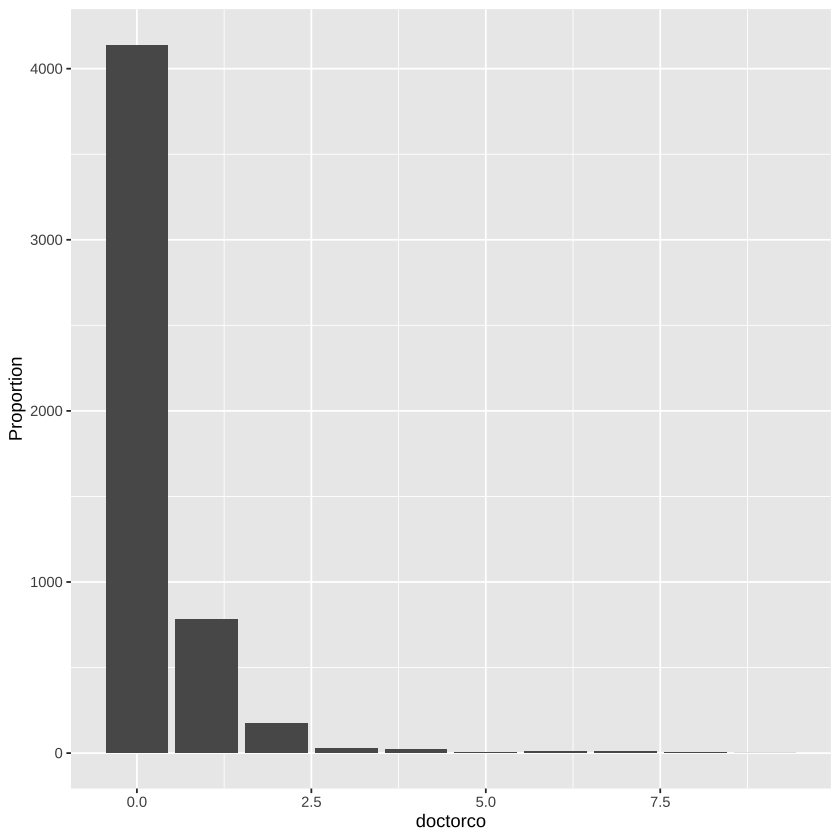

In [41]:
library(ineq)
# Simple Proportions
prop.table(table(health_data$doctorco)) 

# Visualizing with Proportions & Bar Plot
library(ggplot2)
ggplot(health_data, aes(x = doctorco)) + geom_bar() + 
      labs(y = "Proportion") 

# Imbalance Ratio:  (assuming binary classification)
library(imbalance)
IR(health_data$doctorco)

# Gini Coefficient
Gini(health_data$doctorco)

In [39]:
library(ineq)
# Gini Coefficient
Gini(health_data$doctorco)


Caricamento pacchetto: 'ineq'


Il seguente oggetto `e mascherato da 'package:dlookr':

    entropy




[1] 0.8539423